# 3D Reconstruction Basic Code
##### Authors: Brett Nelson and Harnoor Dhingra (NSDS, LBNL)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from sys import exit

In [2]:
input_handle = pd.read_csv('S3_9/Handle.csv', names=["X", "Y", "Z"])
input_bhandle = pd.read_csv('S3_9/B Handle.csv', names=["X", "Y", "Z"])
input_shoulder = pd.read_csv('S3_9/Shoulder 1.csv', names=["X", "Y", "Z"])
input_forearm = pd.read_csv('S3_9/Forearm 1.csv', names=["X", "Y", "Z"])
input_palm = pd.read_csv('S3_9/Palm 1.csv', names=["X", "Y", "Z"])

In [3]:
x, y, z = input_handle["X"], input_handle["Y"], input_handle["Z"]
handle_h = np.vstack((x, y, z))
data_handle = [handle_h]

In [4]:
x, y, z = input_bhandle["X"], input_bhandle["Y"], input_bhandle["Z"]
bhandle_h = np.vstack((x, y, z))
data_bhandle = [bhandle_h]

In [5]:
x, y, z = input_shoulder["X"], input_shoulder["Y"], input_shoulder["Z"]
shoulder_h = np.vstack((x, y, z))
data_shoulder = [shoulder_h]

In [6]:
x, y, z = input_forearm["X"], input_forearm["Y"], input_forearm["Z"]
forearm_h = np.vstack((x, y, z))
data_forearm = [forearm_h]

In [7]:
x, y, z = input_palm["X"], input_palm["Y"], input_palm["Z"]
palm_h = np.vstack((x, y, z))
data_palm = [palm_h]

In [8]:
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, 0:num])
        line.set_3d_properties(data[2,0:num])
    return lines

<IPython.core.display.Javascript object>


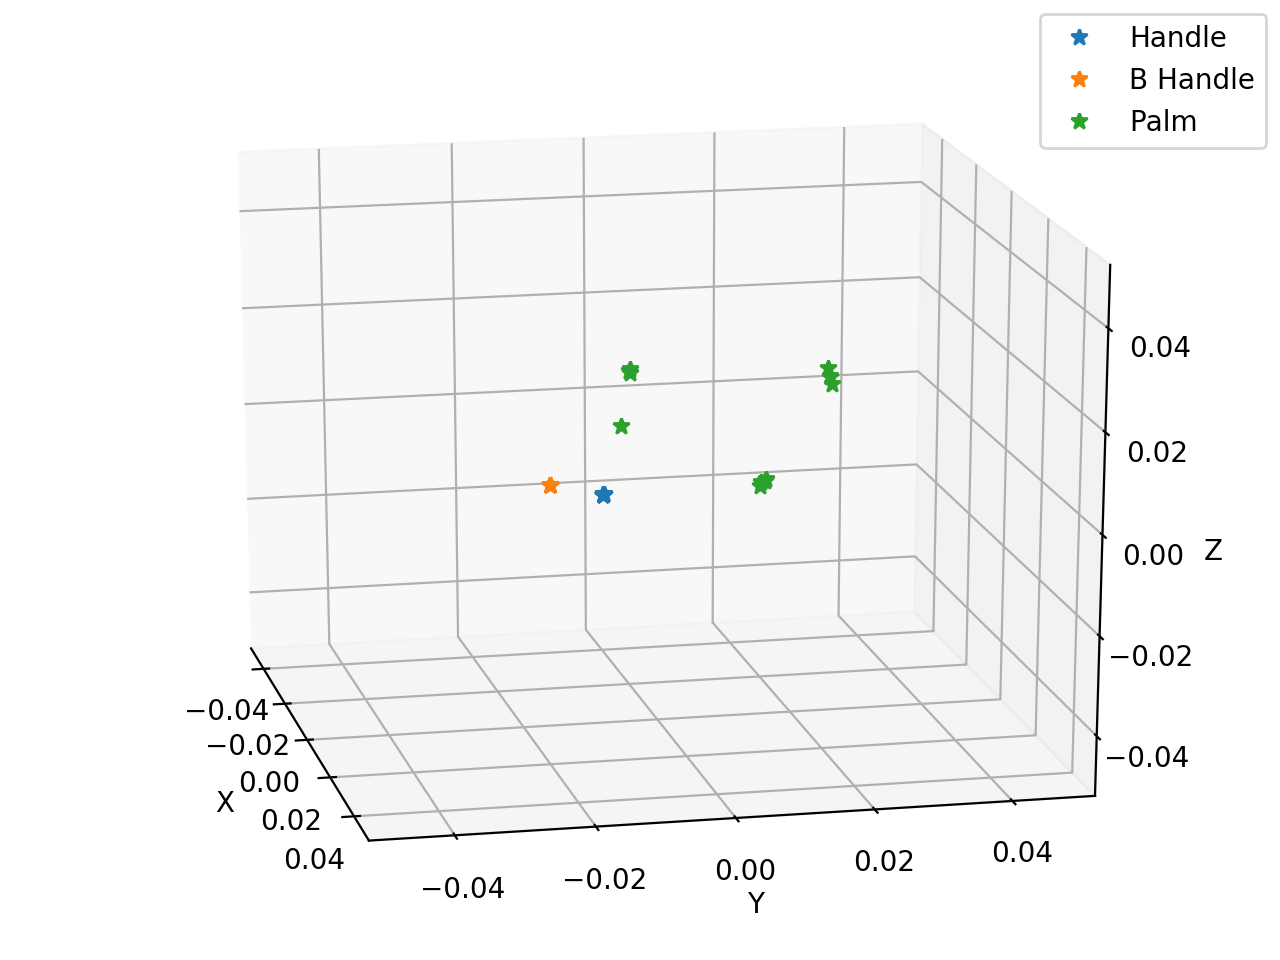

In [12]:
%matplotlib notebook
fig = plt.figure()
ax = p3.Axes3D(fig)

In [13]:
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Test')

Text(0.5, 0.92, '3D Test')

In [14]:
ax.set_xlim3d([-0.05, 0.05])
ax.set_ylim3d([-0.05, 0.05])
ax.set_zlim3d([-0.05, 0.05])

(-0.05, 0.05)

In [15]:
lines_handle = [ax.plot(data_handle[0][0,0:86], data_handle[0][1,0:86], data_handle[0][2,0:86], '*', label = 'Handle')[0]]
lines_bhandle = [ax.plot(data_bhandle[0][0,0:86], data_bhandle[0][1,0:86], data_bhandle[0][2,0:86], '*', label = 'B Handle')[0]]
#lines_shoulder = [ax.plot(data_shoulder[0][0,0:86], data_shoulder[0][1,0:86], data_shoulder[0][2,0:86], '*', label = 'Shoulder')[0]]
#lines_forearm = [ax.plot(data_forearm[0][0,0:86], data_forearm[0][1,0:86], data_forearm[0][2,0:86], '*', label = 'Forearm')[0]]
lines_palm = [ax.plot(data_palm[0][0,0:86], data_palm[0][1,0:86], data_palm[0][2,0:86], '*', label = 'Palm')[0]]
leg = ax.legend();

In [16]:
ani1 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_handle, lines_handle),interval=400, blit=False)
ani2 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_bhandle, lines_bhandle),interval=400, blit=False)
#ani3 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_shoulder, lines_shoulder),interval=400, blit=False)
#ani4 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_forearm, lines_forearm),interval=400, blit=False)
ani5 = animation.FuncAnimation(fig, update_lines, 85, fargs=(data_palm, lines_palm),interval=400, blit=False)

plt.show()